# Image processing
## A crash course with `scipy.ndimage` and `scikit-image`

In [18]:
import skimage.io as io

template_str = '{:>15s} : {}'

print('{0} Available plugins {0}'.format(5 * '-'))
plugins = io.find_available_plugins()
for item in plugins:
    print(template_str.format(item, plugins[item]))

print('\n{0} Loaded plugins {0}'.format(5 * '-'))
plugins = io.find_available_plugins(loaded=True)
for item in plugins:
    print(template_str.format(item, plugins[item]))

----- Available plugins -----
            gtk : ['imshow']
           fits : ['imread', 'imread_collection']
        imageio : ['imread', 'imsave', 'imread_collection']
            pil : ['imread', 'imsave', 'imread_collection']
      simpleitk : ['imread', 'imsave', 'imread_collection']
     matplotlib : ['imshow', 'imread', 'imshow_collection', 'imread_collection']
             qt : ['imshow', 'imsave', 'imread', 'imread_collection']
       tifffile : ['imread', 'imsave', 'imread_collection']
           gdal : ['imread', 'imread_collection']
         imread : ['imread', 'imsave', 'imread_collection']

----- Loaded plugins -----
            pil : ['imread', 'imsave', 'imread_collection']
     matplotlib : ['imshow', 'imread', 'imshow_collection', 'imread_collection']


## `io` with python imaging library (pil/pillow)

The [pillow](https://pillow.readthedocs.io/en/5.3.x/handbook) package---a fork of python imaging library (pil)---is a collection of modules to read/write a wide range of different imaging formats. In addition, it leverages on libraries installed on the system for image processing.

In [26]:
from PIL import Image
import requests  # for url-based image loading
from io import BytesIO

format_string = '{:>10s} : {}'
attrbs = ['format', 'size', 'mode']

In [31]:
with Image.open('./extra/Sage_pollen.jpg') as img:
    for attr in attrbs:
        print(format_string.format(attr, getattr(img, attr)))

    format : JPEG
      size : (2560, 1920)
      mode : RGB


In [28]:
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/f/f8/Sage_pollen.jpg')
with Image.open(BytesIO(response.content)) as img:
    for attr in attrbs:
        print(format_string.format(attr, getattr(img, attr)))

    format : JPEG
      size : (2560, 1920)
      mode : RGB


#### Exercice: Scan through a directory to search for image files

Scan through a directory in search of image files. For each image file show the attributes `format`, `size`, and `mode`. Allow to run the script from the command line with an optional argument that indicates the path, the default being the current directory.

__HINT__ : 
* When running from the command line the `argparse` standard library (argparse [tutorial](https://docs.python.org/3/howto/argparse.html?highlight=argparse)) may come in handy.
* For operations on paths the module `path` from the standard library `os` should be considered, make sure the code is not platform dependent!

## some operations on images with the `pillow` package

In [1]:
from PIL import Image, ImageFilter

box1 = (250, 250, 450, 450)
box2 = (650, 650, 1050, 1050)
with Image.open('./extra/Sage_pollen.jpg') as img:
    region1 = img.crop(box1)
    region1 = region1.transpose(Image.ROTATE_180)
    img.paste(region1, box1)
    
    region2 = img.crop(box2)
    region2 = region2.filter(ImageFilter.MedianFilter(11))
    region2 = region2.filter(ImageFilter.CONTOUR)
    # img.save('./extra/Sage_pollen_EDGE_ENCHANCE.jpg')
    img.paste(region2, box2)
    img.show()

## displaying the image in the notebook

 we propose two options: `matplotlib` and `plotly`

In [5]:
from PIL import Image
import plotly.offline as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

with Image.open('./extra/Sage_pollen.jpg') as img:
    img_width, img_height = img.size
    # alternatively use pillow's Image.resize, see https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

scale_factor = 400 / max(img_width, img_height)

layout = go.Layout(
    xaxis = go.layout.XAxis(
        visible = False,
        range = [0, img_width*scale_factor]),
    yaxis = go.layout.YAxis(
        visible=False,
        range = [0, img_height*scale_factor],
        # the scaleanchor attribute ensures that the aspect ratio stays constant
        scaleanchor = 'x'),
    width = img_width*scale_factor,
    height = img_height*scale_factor,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    images = [go.layout.Image(
        x=0,
        sizex=img_width*scale_factor,
        y=img_height*scale_factor,
        sizey=img_height*scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source='./extra/Sage_pollen.jpg')]
)
# we add a scatter trace with data points in opposite corners to give the Autoscale feature a reference point
fig = go.Figure(data=[{
    'x': [0, img_width*scale_factor], 
    'y': [0, img_height*scale_factor], 
    'mode': 'markers',
    'marker': {'opacity': 0}}],layout = layout)
py.iplot(fig, filename='EXAMPLES/zoom_Pollen')

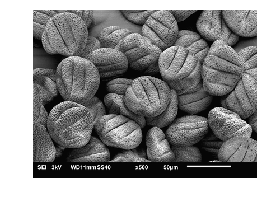

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

%matplotlib inline

with Image.open('./extra/Sage_pollen.jpg') as img:
    img_width, img_height = img.size
    scale_factor = 400 / max(img_width, img_height)
    im_width = round(scale_factor * img_width)
    im_height = round(scale_factor * img_height)
    im = img.resize((im_width, im_height), Image.LANCZOS)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im)
ax.set_axis_off()  # equivalent to the following two lines of code
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
ax.autoscale(False)

In [8]:
from PIL import Image, ImageFilter

box1 = (250, 250, 450, 450)
box2 = (650, 650, 1050, 1050)
with Image.open('./extra/Sage_pollen.jpg') as img:
    region1 = img.crop(box1)
    region1 = region1.transpose(Image.ROTATE_180)
    img.paste(region1, box1)
    
    img.save('./extra/Sage_pollen2.jpg')

In [13]:
from PIL import ImageMath       
    

with Image.open('./extra/Sage_pollen.jpg') as img:
    with Image.open('./extra/Sage_pollen2.jpg') as img2:
        #imgdiff = ImageMath.eval("convert(abs(a - b), 'L')", a=img.convert('L'), b=img2.convert('L'))
        #imgdiff.show()
        img[..., ::2].show()
        

TypeError: 'JpegImageFile' object is not subscriptable

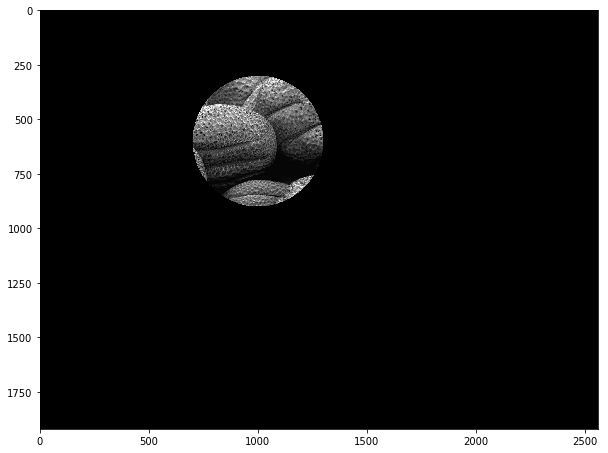

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from copy import copy

img = mpimg.imread('./extra/Sage_pollen.jpg')

def focus(img, center, radius):
    from numpy import ma
    x, y = np.meshgrid(np.arange(img.shape[0]),
                       np.arange(img.shape[1]),
                       indexing='ij')
    mask = (x - center[0]) ** 2 + (y - center[1]) ** 2 > radius ** 2
    mask = np.concatenate([mask[:, :, np.newaxis]] * 3, axis=2)
    img2 = img.copy()

    img2[mask] = 0 #ma.masked_where(mask, img)
    return img2

img_m = focus(img, (600, 1000), 300)

fig, ax = plt.subplots(figsize=(10, 16))
ax.imshow(img_m, cmap=plt.cm.gray)






(1920, 2560, 3)
(2, 2)


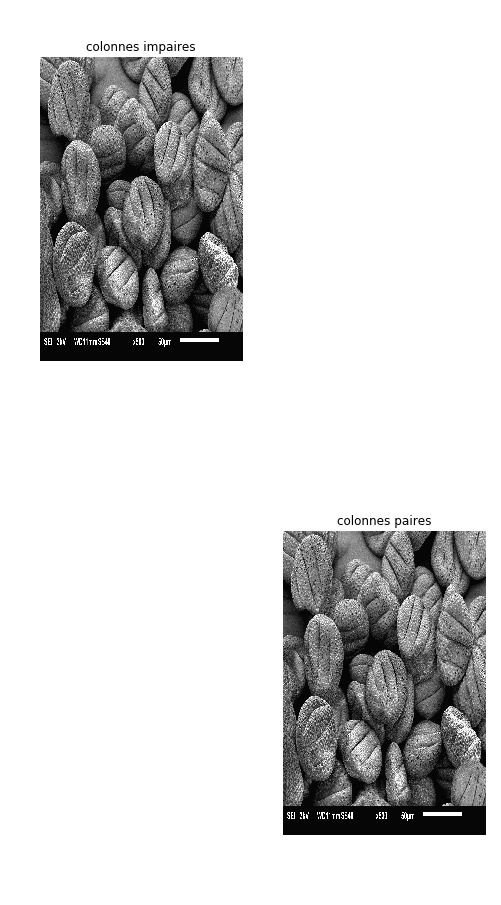

In [26]:
print(img.shape)
fig, ax = plt.subplots(2, 2, figsize=(8, 16))
print(ax.shape)
ax[0, 0].imshow(img[:, ::2, :])
ax[0, 0].set_title('colonnes impaires')
ax[1, 1].imshow(img[:, 1::2, :])
ax[1, 1].set_title('colonnes paires')

M = np.full(img.shape / np.asarray([1, 2, 1]), np.nan)
M[]

for a in ax.ravel():
    a.set_axis_off() 